## Dataset Exploration

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data
labels = np.load('species_data_training.npy')

labels = pd.DataFrame(labels)
labels.columns.name = "Plant species"

labels.head()

Plant species,0,1,2,3,4,5,6,7,8,9,...,332,333,334,335,336,337,338,339,340,341
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


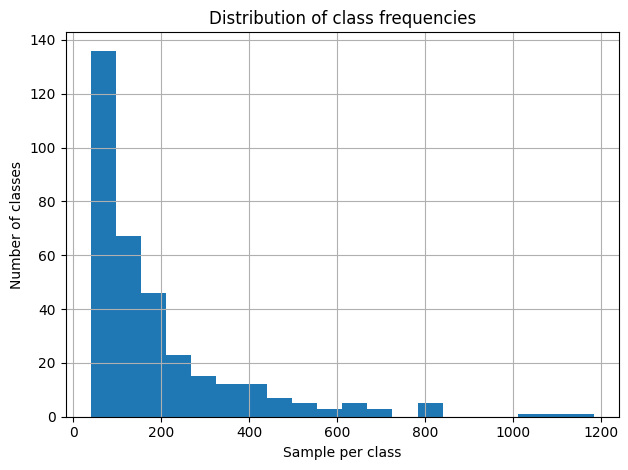

In [4]:
# View distribution of labels
counts = labels.sum(axis=0)
counts.hist(bins=20)

plt.xlabel('Sample per class')
plt.ylabel('Number of classes')
plt.title('Distribution of class frequencies')
plt.tight_layout()

### Landsat Timeseries

In [5]:
def get_timeseries(data):
    """
    Extract timeseries data with shape (T, 4)
    """
    return data.reshape(-1, 40).transpose()

In [6]:
landsat = pd.read_csv('landsat_timeseries_training.csv')
landsat.drop(columns='surveyId', inplace=True)

landsat.head()

,landsat_red_2008_1,landsat_red_2008_2,landsat_red_2008_3,landsat_red_2008_4,landsat_red_2009_1,landsat_red_2009_2,landsat_red_2009_3,landsat_red_2009_4,landsat_red_2010_1,landsat_red_2010_2,...,landsat_nir_2015_3,landsat_nir_2015_4,landsat_nir_2016_1,landsat_nir_2016_2,landsat_nir_2016_3,landsat_nir_2016_4,landsat_nir_2017_1,landsat_nir_2017_2,landsat_nir_2017_3,landsat_nir_2017_4
0,7.0,7.0,10.0,8.0,6.0,10.0,11.0,8.0,9.0,11.0,...,35.0,28.0,28.0,32.0,35.0,30.0,21.0,34.0,35.0,35.0
1,18.0,15.0,23.0,17.0,18.0,11.0,19.0,14.0,18.0,19.0,...,99.0,86.0,88.0,94.0,99.0,104.0,91.0,91.0,90.0,87.0
2,6.0,9.0,10.0,10.0,6.0,10.0,10.0,10.0,6.0,7.0,...,10.0,23.0,24.0,11.0,12.0,20.0,24.0,15.0,12.0,22.0
3,23.0,23.0,10.0,15.0,29.0,41.0,18.0,19.0,21.0,25.0,...,92.0,74.0,65.0,85.0,90.0,78.0,65.0,83.0,96.0,72.0
4,24.0,44.0,26.0,19.0,31.0,17.0,27.0,31.0,20.0,46.0,...,86.0,73.0,67.0,90.0,83.0,78.0,68.0,88.0,117.0,73.0


In [7]:
# Extract proper data format
N, T = landsat.shape
landsat_clean = np.zeros((N, T//4, 4))

for i, row in landsat.iterrows():
    landsat_clean[i] = get_timeseries(row.values)

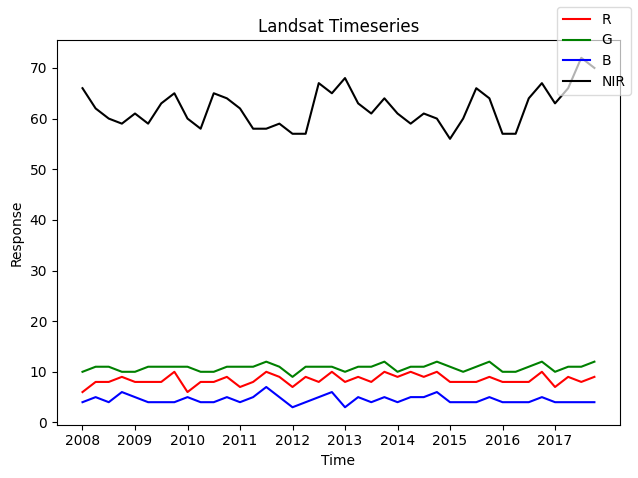

In [8]:
i = np.random.randint(0, N)
bands = ['R', 'G', 'B', 'NIR']
colors = ['r', 'g', 'b', 'k']

fig, ax = plt.subplots()

for band in range(4):
    ax.plot(landsat_clean[i, :, band], label=bands[band], color=colors[band])
    
ax.set_xlabel('Time')
ax.set_xticks(np.arange(0,landsat_clean.shape[1], 4), np.arange(2008, 2018))
ax.set_ylabel('Response')
ax.set_title('Landsat Timeseries')
fig.legend(framealpha=0.7)
fig.tight_layout()
plt.show()

### Satellite Patches

In [9]:
import skimage as ski

images = np.load('satellite_patches_training.npy')

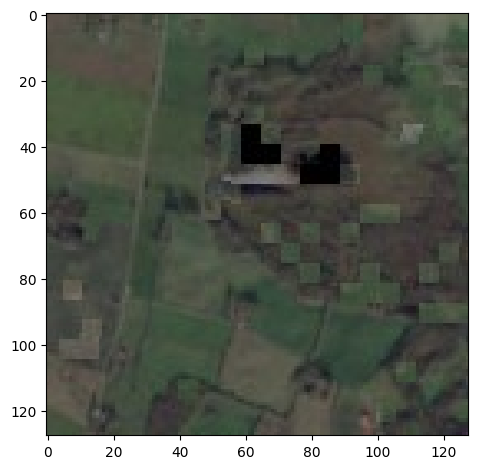

In [10]:
i = np.random.randint(0, images.shape[0])

ski.io.imshow(np.moveaxis(images[i], 0, -1))
plt.show()

### Environmental Variables

In [11]:
env = pd.read_csv('env_variables_training.csv').drop(columns=['surveyId','Bio3', 'Bio5', 'Bio6'])

env.head()

# Note: some variables are linearly dependent on others and should likely be removed https://www.worldclim.org/data/bioclim.html
# Linearly dependent (can be dropped): BIO3, BIO5, BIO6

,lon,lat,Bio1,Bio2,Bio4,Bio7,Bio8,Bio9,Bio10,Bio11,Bio12,Bio13,Bio14,Bio15,Bio16,Bio17,Bio18,Bio19
0,3.099038,43.134956,2883,68,5545,227,2854,2958,2958,2816,6355,933,143,395,2282,770,770,1917
1,9.884560,56.912140,2815,59,5690,215,2860,2768,2890,2746,7286,792,376,201,2283,1336,2076,1653
2,8.256020,55.637050,2821,26,5150,169,2838,2832,2888,2759,8546,1117,372,295,2986,1438,2448,1838
3,-0.402590,43.505630,2870,90,5315,236,2810,2938,2938,2802,10719,1163,564,197,3216,1948,1948,2926
4,-0.517360,45.806430,2858,81,5285,224,2827,2927,2927,2792,9353,1095,503,249,3186,1638,1638,2677


In [12]:
# Get basic stats for each variable
env.describe()

,lon,lat,Bio1,Bio2,Bio4,Bio7,Bio8,Bio9,Bio10,Bio11,Bio12,Bio13,Bio14,Bio15,Bio16,Bio17,Bio18,Bio19
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,8.518079,52.725251,2826.360600,57.928200,5637.099000,212.692200,2849.176800,2804.112400,2900.005600,2756.962600,8631.131800,994.258800,422.354200,225.395200,2748.688400,1549.61560,2180.177800,2099.898200
std,3.865616,4.709933,22.028845,18.163861,538.109048,29.070935,37.974328,59.283376,22.353763,24.114151,2349.581433,341.805558,137.419601,86.757423,921.851595,442.48165,551.150028,778.503683
min,-6.124781,37.670667,2700.000000,14.000000,3382.000000,135.000000,2659.000000,2608.000000,2790.000000,2600.000000,4222.000000,521.000000,26.000000,84.000000,1319.000000,147.00000,330.000000,707.000000
25%,5.899618,51.018227,2815.000000,46.750000,5387.000000,197.000000,2827.000000,2768.000000,2888.000000,2746.000000,7502.750000,817.000000,369.000000,175.000000,2325.750000,1345.00000,2036.000000,1740.000000
50%,9.091380,55.222020,2819.000000,60.000000,5591.500000,212.000000,2859.000000,2792.000000,2893.000000,2753.000000,8327.500000,915.500000,407.000000,209.000000,2529.000000,1513.00000,2188.000000,1993.000000
75%,10.167190,56.236255,2834.000000,69.000000,5726.000000,221.000000,2867.000000,2802.000000,2904.000000,2763.000000,9058.000000,1079.000000,458.000000,247.000000,2905.000000,1737.00000,2375.000000,2263.000000
max,28.975325,57.749140,2916.000000,116.000000,8350.000000,321.000000,2940.000000,2988.000000,2988.000000,2861.000000,29885.000000,4019.000000,1500.000000,667.000000,11161.000000,4873.00000,7859.000000,9163.000000


In [13]:
env.apply(lambda col: (col - col.mean()) / col.std(), axis=0).describe()

,lon,lat,Bio1,Bio2,Bio4,Bio7,Bio8,Bio9,Bio10,Bio11,Bio12,Bio13,Bio14,Bio15,Bio16,Bio17,Bio18,Bio19
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,3.552714e-17,-5.968559e-16,1.058709e-15,1.776357e-16,-2.984279e-16,-4.597212e-16,-4.868639e-15,3.417711e-16,1.847411e-15,6.700418e-15,3.396394e-16,1.364242e-16,5.968559e-17,1.335820e-16,2.842171e-18,-1.961098e-16,1.250555e-16,-1.080025e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.787976e+00,-3.196348e+00,-5.736143e+00,-2.418440e+00,-4.190784e+00,-2.672504e+00,-5.008036e+00,-3.308050e+00,-4.921122e+00,-6.509149e+00,-1.876561e+00,-1.384585e+00,-2.884262e+00,-1.629776e+00,-1.550888e+00,-3.169884e+00,-3.356940e+00,-1.789199e+00
25%,-6.773724e-01,-3.624304e-01,-5.157147e-01,-6.154088e-01,-4.647738e-01,-5.397900e-01,-5.839945e-01,-6.091488e-01,-5.370729e-01,-4.546127e-01,-4.802480e-01,-5.185954e-01,-3.882576e-01,-5.808748e-01,-4.587923e-01,-4.624273e-01,-2.615945e-01,-4.622948e-01
50%,1.483077e-01,5.301071e-01,-3.341346e-01,1.140617e-01,-8.473933e-02,-2.381072e-02,2.586800e-01,-2.043136e-01,-3.133969e-01,-1.643267e-01,-1.292280e-01,-2.304199e-01,-1.117322e-01,-1.889775e-01,-2.383121e-01,-8.275055e-02,1.419251e-02,-1.373124e-01
75%,4.266101e-01,7.454467e-01,3.467908e-01,6.095510e-01,1.652100e-01,2.857768e-01,4.693487e-01,-3.563225e-02,1.786903e-01,2.503675e-01,1.816784e-01,2.479222e-01,2.593939e-01,2.490254e-01,1.695627e-01,4.234851e-01,3.534831e-01,2.095068e-01
max,5.292105e+00,1.066658e+00,4.069183e+00,3.197107e+00,5.041545e+00,3.725639e+00,2.391700e+00,3.101841e+00,3.936447e+00,4.314371e+00,9.045810e+00,8.849304e+00,7.842009e+00,5.090110e+00,9.125451e+00,7.510785e+00,1.030359e+01,9.072663e+00


## Prepare datasets for training

In [27]:
"""
Spectral indices helpers
"""

def add_EVI(data):
    """
    Enhanced vegetation index (EVI) = (NIR - R) / (NIR + 6*R - 7.5*B + 1)
    """
    evi = (data[...,3] - data[...,0]) / (data[...,3] + 6*data[...,0] - 7.5*data[...,2] + 1 + 1e-8)
    
    return np.concatenate((data, evi[..., None]), axis=-1)

def add_SAVI(data, L=0.5):
    """
    SAVI = ((NIR - R)(1 + L)) / (NIR + R + L) with L = 0.5
    """
    savi = ((data[...,3] - data[...,0]) * (1 + L)) / (data[...,3] + data[...,0] + L)

    return np.concatenate((data, savi[..., None]), axis=-1)

def add_GNDVI(data):
    gndvi = (data[...,3] - data[...,1]) / (data[...,3] + data[...,1] + 1e-8)
    
    return np.concatenate((data, gndvi[..., None]), axis=-1)

def add_spectral_indices(data, savi=True, evi=True, gnvdi=True):
    if savi:
        data = add_SAVI(data)
    if evi:
        data = add_EVI(data)
    if gnvdi:
        data = add_GNDVI(data)
    
    return data

In [28]:
def process_env(df: pd.DataFrame):
    # Remove linearly depedent columns
    df = df.drop(columns=['surveyId','Bio3', 'Bio5', 'Bio6'])
    
    # Normalize features
    return df.apply(lambda col: (col - col.mean()) / col.std(), axis=0).to_numpy()

def get_timeseries(data):
    """
    Extract timeseries data with shape (T, 4)
    """
    return data.reshape(-1, 40).transpose()

def process_timeseries(df: pd.DataFrame):
    """
    Create features from timeseries
    """
    # Remove index
    df.drop(columns='surveyId', inplace=True)
    
    # Reshape to get correct structure
    N, T = df.shape
    landsat_clean = np.zeros((N, T//4, 4))

    for i, row in df.iterrows():
        landsat_clean[i] = get_timeseries(row.values)
    
    # Add spectral indices
    landsat_clean = add_spectral_indices(landsat_clean)
    
    # Normalize across each feature
    landsat_clean = (landsat_clean - landsat_clean.mean(axis=1, keepdims=True)) / (landsat_clean.std(axis=1, keepdims=True) + 1e-8)
    
    return landsat_clean

def process_images(images: np.ndarray):
    return (images - images.mean(axis=(-2,-1), keepdims=True)) / (images.std(axis=(-2,-1), keepdims=True) + 1e-8)

In [29]:
# Change path according to data location

# Process env data
env = pd.read_csv('env_variables_training.csv')
env_final = process_env(env)

# Process timeseries
landsat = pd.read_csv('landsat_timeseries_training.csv')
landsat_final = process_timeseries(landsat)

# Process images
images = np.load('satellite_patches_training.npy') # shape: (N, C, W, H)
images_final = process_images(images)

# Load labels
labels = np.load('species_data_training.npy')

# Save files
np.savez('training_set.npz', env=env_final, landsat=landsat_final, images=images_final, labels=labels)

In [ ]:
# Process env data
env = pd.read_csv('env_variables_test.csv')
env_final_test = process_env(env)

# Process timeseries
landsat = pd.read_csv('landsat_timeseries_test.csv')
landsat_final_test = process_timeseries(landsat)

# Process images
images = np.load('satellite_patches_test.npy')
images_final_test = process_images(images)

# Load labels
labels_test = np.load('species_data_test.npy')

# Save files
np.savez('validation_set.npz', env=env_final_test, landsat=landsat_final_test, images=images_final_test, labels=labels_test)